<a href="https://colab.research.google.com/github/sp9103/ARC/blob/master/ARC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from google.colab import files
from google.colab import drive
from pathlib import Path
import os
import json

pd.set_option('display.precision', 8)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from tqdm import tqdm

In [6]:
path = '/content/gdrive'
drive.mount(path)
path += '/My Drive/ARC'

cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
             '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
TEST_PATH = Path(path)
SUBMISSION_PATH = Path(path)

TEST_PATH = TEST_PATH / 'test'
SUBMISSION_PATH = SUBMISSION_PATH / 'sample_submission.csv'

# Load Data

In [8]:
test_task_files = sorted(os.listdir(TEST_PATH))

test_tasks = []
for task_file in tqdm(test_task_files):
    with open(str(TEST_PATH / task_file), 'r') as f:
        task = json.load(f)
        test_tasks.append(task)

100%|██████████| 100/100 [00:15<00:00,  7.44it/s]


# Extract training / testing data

In [0]:
Xs_test, Xs_train, ys_train = [], [], []

for task in test_tasks:
    X_test, X_train, y_train = [], [], []

    for pair in task["test"]:
        X_test.append(pair["input"])

    for pair in task["train"]:
        X_train.append(pair["input"])
        y_train.append(pair["output"])

    Xs_test.append(X_test)
    Xs_train.append(X_train)
    ys_train.append(y_train)

In [0]:
matrices = []
for X_test in Xs_test:
    for X in X_test:
        matrices.append(X)

values = []
for matrix in matrices:
    for row in matrix:
        for value in row:
            values.append(value)

df = pd.DataFrame(values)
df.columns = ['values']

In [0]:
df.head()

,values
0,3
1,2
2,7
3,8
4,0


In [12]:
Xs_test[0]

[[[3, 2], [7, 8]]]

# Visualize Data

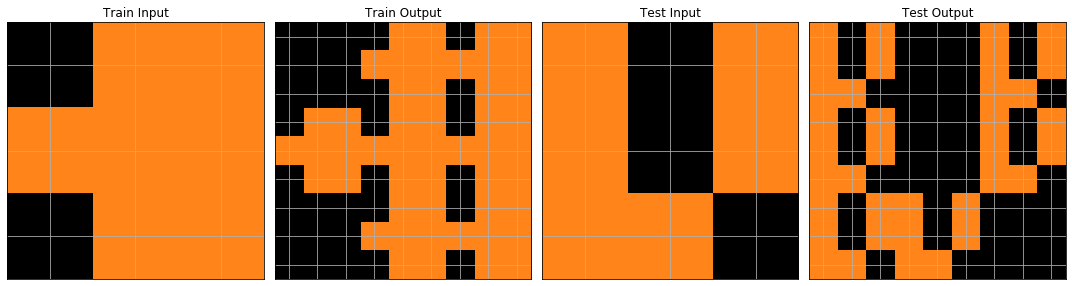

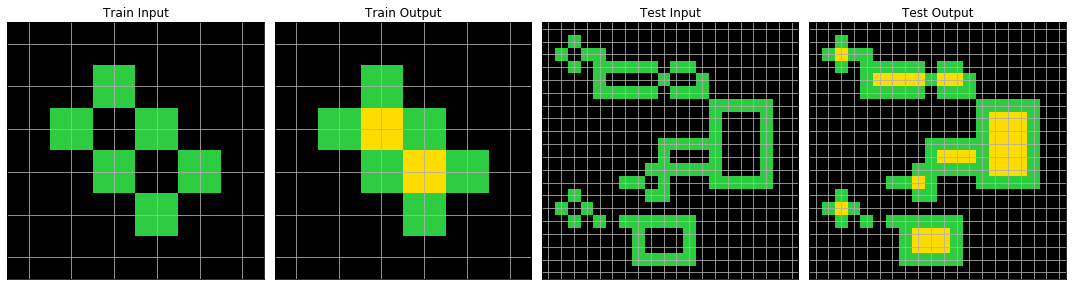

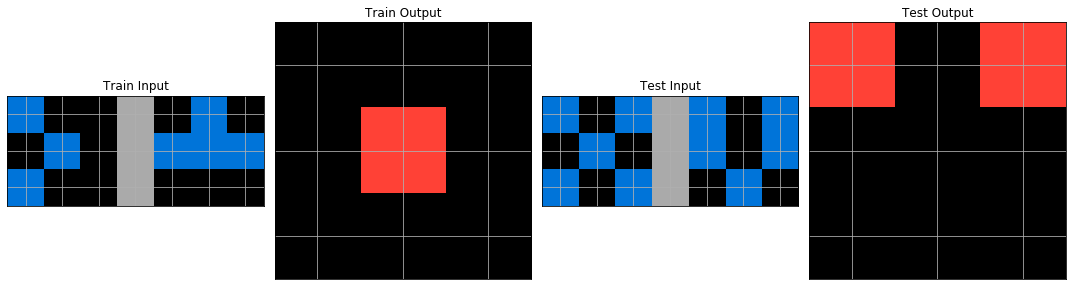

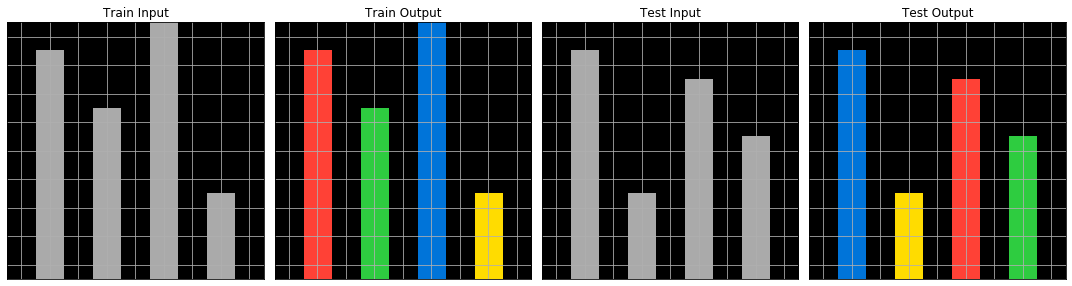

In [0]:
def plot_partial(ax, img, title):
    norm = colors.Normalize(vmin=0, vmax=9)
    ax.imshow(img, cmap=cmap, norm=norm)
    width = np.shape(img)[1]
    height = np.shape(img)[0]
    ax.set_xticks(np.arange(0,width))
    ax.set_yticks(np.arange(0,height))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(length=0)
    ax.grid(True)
    ax.set_title(title)

def plot_task(task):
    fig, ax = plt.subplots(1, 4, figsize=(15,15))
    plot_partial(ax[0], task['train'][0]['input'], 'Train Input')
    plot_partial(ax[1], task['train'][0]['output'], 'Train Output')
    plot_partial(ax[2], task['test'][0]['input'], 'Test Input')
    plot_partial(ax[3], task['test'][0]['output'], 'Test Output')
    plt.tight_layout()
    plt.show()

data_path = Path(path)
training_path = data_path / 'training'
training_tasks = sorted(os.listdir(training_path))

for i in (0, 1, 5, 9):
    task_file = str(training_path / training_tasks[i])

    with open(task_file, 'r') as f:
        task = json.load(f)

    plot_task(task)

    